# Phase 4 Assessment Review

_January 20, 2021_

Agenda Today:
- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import seaborn as sns

## Part I. PCA

Projects the data into smaller space.

In [23]:
# Import the mpg dataset and build pca
mpg = sns.load_dataset('mpg')
# what are some of the steps to build pca?
mpg_features = mpg.iloc[:,:5]
# step 1 - standardize and scale
scaler = StandardScaler()
mpg_scaled = pd.DataFrame(scaler.fit_transform(mpg_features), columns=mpg_features.columns)
mpg_scaled.dropna(axis = 0, inplace = True)

In [24]:
mpg_scaled.head()

,mpg,cylinders,displacement,horsepower,weight
0,-0.706439,1.498191,1.090604,0.664133,0.630870
1,-1.090751,1.498191,1.503514,1.574594,0.854333
2,-0.706439,1.498191,1.196232,1.184397,0.550470
3,-0.962647,1.498191,1.061796,1.184397,0.546923
4,-0.834543,1.498191,1.042591,0.924265,0.565841


In [25]:
# step 2 fit our pca - and specify i only want the amount of components that explain 90% of the variance 
mpg_pca = PCA(n_components=.9)

# fit the pca

mpg_pca.fit(mpg_scaled)

PCA(n_components=0.9)

In [26]:
# check out how many components there are 
mpg_pca.n_components_

2

In [47]:
mpg_pca.explained_variance_

array([4.46283072, 0.26687393])

In [27]:
# how much variance each comp is explaining
mpg_pca.explained_variance_ratio_

array([0.88746492, 0.05306974])

#### What are some of the advantages using PCA? How does it help reduce dimensions?

1. Helps with multicollinearty because each component is linearly independent
2. No loss of data
3. Data visualization since you bring it down to lower dimensions

## Part II. Clustering

- Describe the algorithm of [K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) Clustering 


In [49]:
#What is KMeans
#“the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”
#A cluster refers to a collection of data points aggregated together because of certain similarities.

In [48]:
#1. Randomly Initialize K centroids
#2. Assign observations to each centroid using distance. Observations will be assigned to it's closest centroid
#3. re-center centroids using mean distance of assigned observations
#4.repeat steps 2 & 3 until centroids stabalize

Randomly initialize centroids
Assign each data point to the centroid closest to it
Update position of centroid to be at mean distance of its members, moving centroid to center of all its members
Repeat steps 2-3 until centroid positions stop changing

In [29]:
# building a k-means clustering model - with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit the kmeans
kmeans.fit(mpg_scaled)

KMeans(n_clusters=3)

In [30]:
# we can get the labels

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2,

In [31]:
# what are some of the ways to evaluate k-means?
#Silhouette score - the distance between clusters minus the distance within clusters. The higher the value the better
#ranges from -1 to 1
#a measurment that allows you to evaluate how good the clusters are
#difference between between clusters and within clusters. We want the difference to be large
#1 is a really good silhouette and -1 is a poorly formed cluster


# how to select the best value of k using those metrics?
#using elbow method
#k axis is K, y axis is silhouette score, for each K value, acquire the silhouette score
#pick the highest silhouette score
#

In [ ]:
#graph elbow
sil = []

for i in range(4):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(data)
    sil.append(Kmeans.inertia_)

## Part III. Natural Language Processing 
- What are some of the ways in which we can engineer features in NLP?
- What is TF-IDF, how is it calculated? What does it represent?

We engineer features with BoW and TF-IDF

TF(term frequency) which is a count of how many times a token shows up within a certain document \
IDF(iverse document frequency) - how common a word is in the corpus \
idf = log(total # doc/ document containing w) \
if a word is unique, idf goes up. which means it's more important \
tf*idf

In [32]:
# instantiate some data 
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
labels = [0,1,1,0]
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df['label'] = labels

In [33]:
df.head()

,review,label
0,"6/10 Acting, not great but some good acting.<b...",0
1,Devil Hunter gained notoriety for the fact tha...,1
2,`Stanley and Iris' is a heart warming film abo...,1
3,"This may not be a memorable classic, but it is...",0


In [34]:
# define our x and y
X = df.review
y = df.label

In [35]:
# what are some of the steps to engineer the features?

# stop words removal

stopwords = ['am','he','i','the','hi']

# what if you need to remove more stopwords than this collection?

# use tfidf, with unigrams and bigrams, and remove stop words
vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words=stopwords)

#

## could you add some optional parameters to that?


**Interpretation of TFIDF** 

What does a high value of TFIDF tell you about a certain word?

In [36]:
# what are the step by step process of doing text classification

# step 1 - train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# step 2 - tokenize and feature engineer using tfidf 

train_features =  vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

# step 3 - fit the model to the training set, test the model on the testing set
classifier = RandomForestClassifier()
classifier.fit(train_features,y_train)

# step 4 - output prediction on testing set, compare true labels to predicted labels, get accuracy
pred = classifier.predict(test_features)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.0

## Part IV. Time Series

In [55]:
ts = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [56]:
ts.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [57]:
# covert the date to datetime 
ts['Date'] = pd.to_datetime(ts['Date'])
# your code below


In [41]:
# set the index to date
ts.set_index('Date', inplace = True)

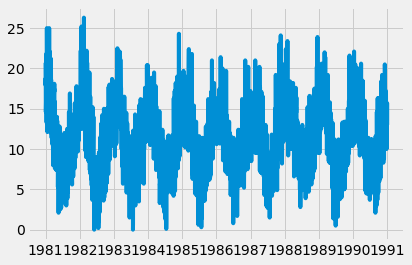

In [42]:
# visualize the daily temperature 
plt.plot(ts['Temp'])

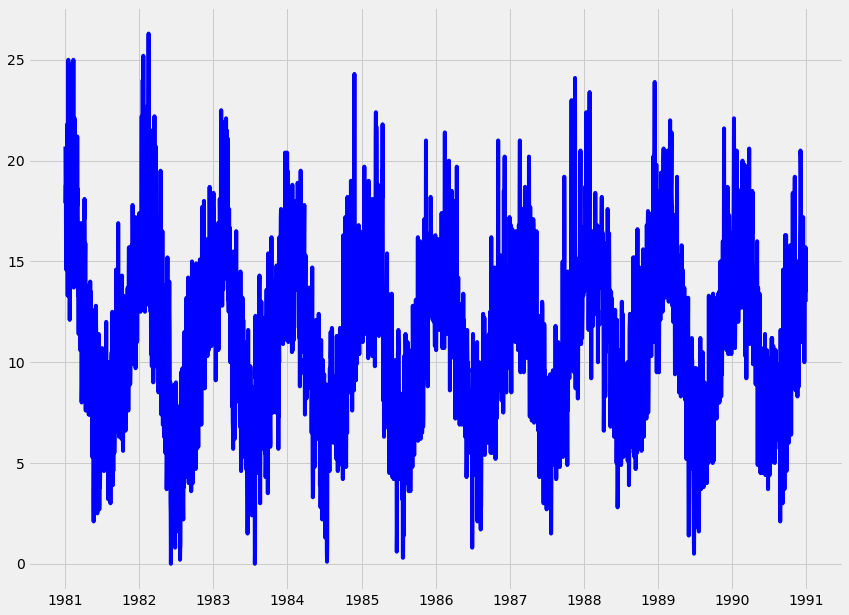

In [43]:
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(ts['Temp'], color='blue',label='daily opening stock price')

In [44]:
# get only the monthly mean 
monthly = ts.resample('M').mean()

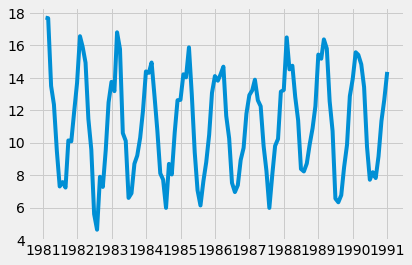

In [45]:
# visualize monthly mean
plt.plot(monthly['Temp'])

                 Temp
Date                 
1981-01-31        NaN
1981-02-28        NaN
1981-03-31  16.297158
1981-04-30  14.511746
1981-05-31  11.782330
...               ...
1990-08-31   7.909892
1990-09-30   8.392115
1990-10-31   9.445878
1990-11-30  11.056165
1990-12-31  12.789857

[120 rows x 1 columns]


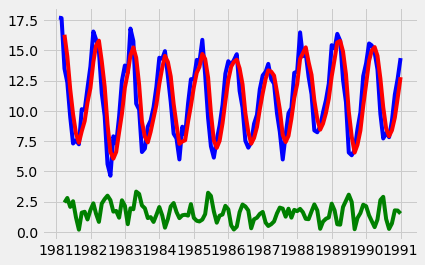

In [58]:
# get the rolling mean, rolling standard deviation, and visualize all three of them together
#for every 3 periods, i calculate the mean or std, it's a method to smooth out the data"
roll_mean = monthly.rolling(window = 3).mean()
roll_std = monthly.rolling(window = 3).std()
plt.plot(monthly['Temp'], color = 'blue')
plt.plot(roll_mean, color = 'red')
plt.plot(roll_std, color = 'green')

print(roll_mean)

In [59]:
## what are some of the assumptions of using arima model? 
#stationarity and there has to be equal intervals of data
#stationarity is the assumption that the data is constant in the mean value, covariance, and variance

# does our dataset satisfy this assumption?

# what kind of test can you use to find out?

In [35]:
# do a dickey fuller test to find out whether our dataset is stationary or not
from statsmodels.tsa.stattools import adfuller
test = adfuller(monthly['Temp'])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -1.892313
p-value                          0.335686
#Lags Used                      13.000000
Number of Observations Used    106.000000
dtype: float64


In [60]:
#null is that there is no stationarity and you want to reject the null.
#rejecting the null (pvalue lower than 0.05) would mean that there is stationarity
#Above, we fail to reject the null, so there is no stationarity
#the p-value is greater than the critical value(0.05) so we fail to reject the null

In [61]:
#Covariance evaluates how the mean values of two variables move together.
#The term variance refers to a statistical measurement of the spread between numbers in a data set. 
#More specifically, variance measures how far each number in the set is from the mean and thus from every other number in the set.